In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import random
!pip install image-quality
import imquality.brisque as brisque

In [ ]:
img = cv.imread("trees.jpg")


In [ ]:
img.shape

(853, 1280, 3)

In [ ]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # Convert to greyscale

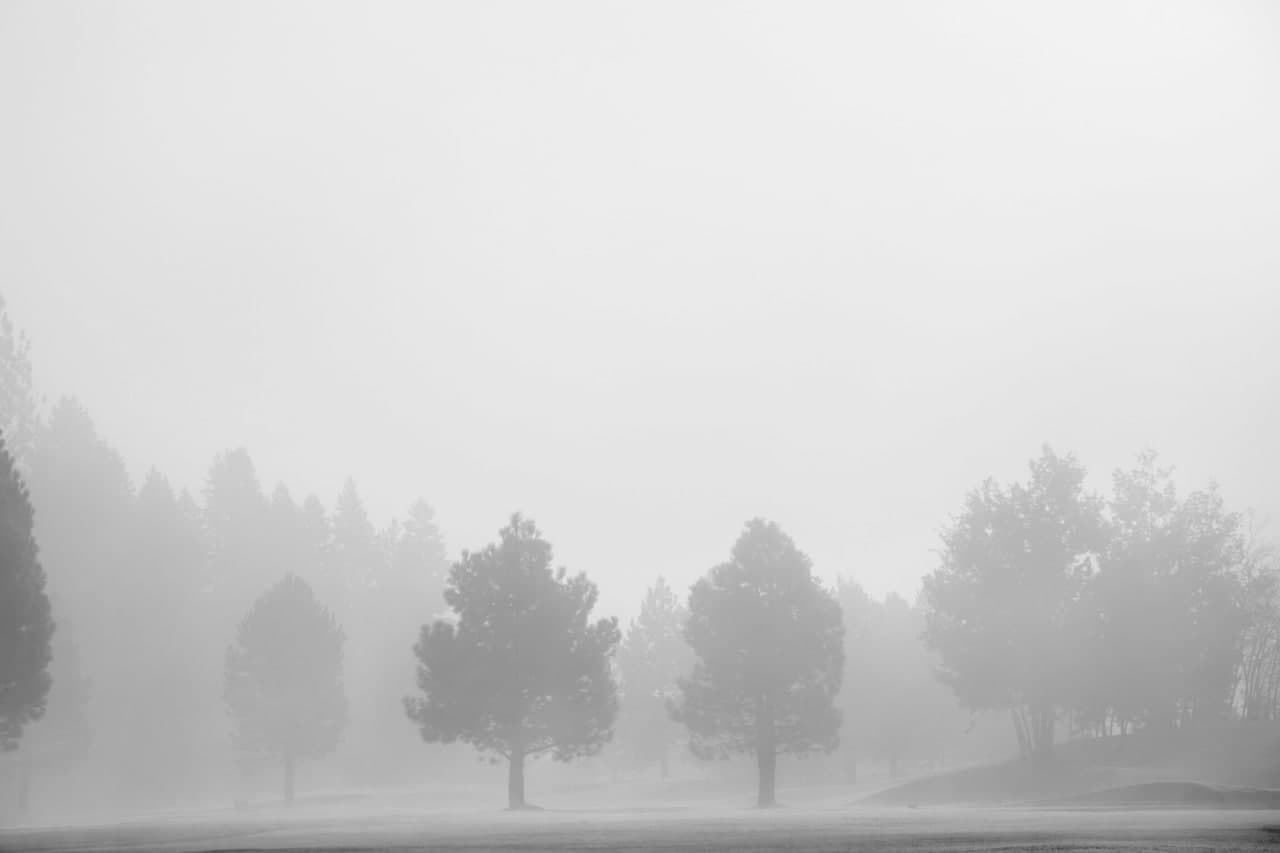

In [ ]:
 from google.colab.patches import cv2_imshow
cv2_imshow(gray)
#cv.waitKey(0)
#cv.destroyAllWindows()

Histogram equalization

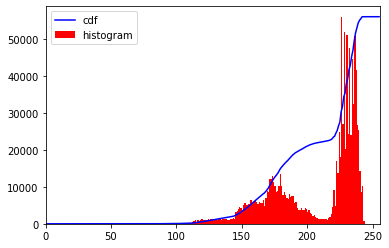

In [ ]:
# This is original histogram, as you can see all values are bunched at the center
hist,bins = np.histogram(gray.flatten(),bins = 256,range = [0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [ ]:
equ = cv.equalizeHist(gray) # This line equalizes histogram, now we can see it's spread out. Also makes sense that the new histogram has larger standard deviation

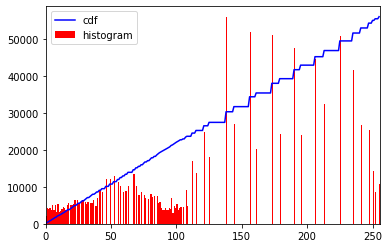

In [ ]:
hist,bins = np.histogram(equ.flatten(),bins = 256,range = [0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [ ]:
#
print(np.std(gray)) # Original sd
print(np.std(equ))  # Sd after equalization

32.67526660328546
75.02563067562087


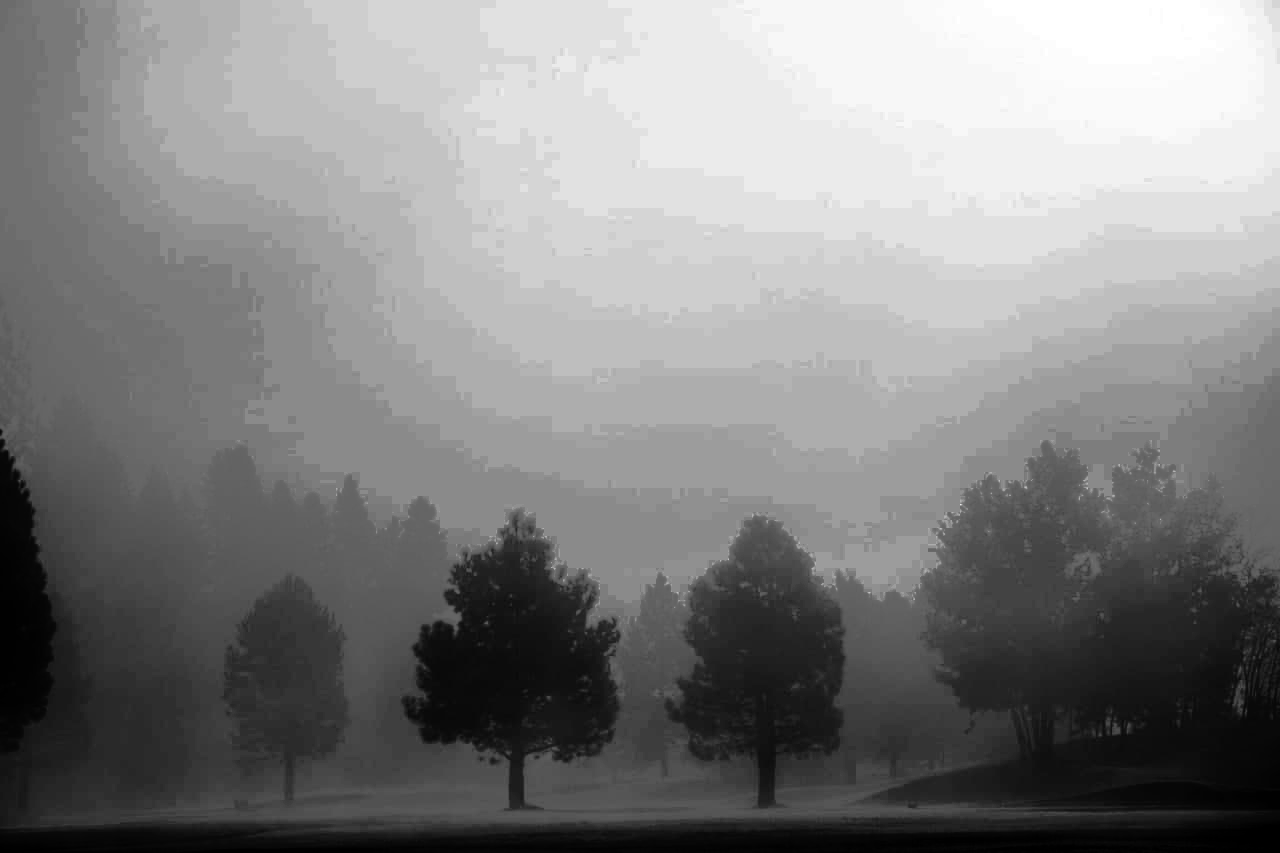

In [ ]:
cv2_imshow(equ) # After histogram normalization
#cv2_imshow(img1)

In [ ]:
#brisque.score(equ)

Now using the method from the research paper (with constants unchanged and window size 10)

In [ ]:
new_image = np.zeros((gray.shape[0],gray.shape[1]))
a = 0
b = 0
c = 1
k = 1
n_size = 10
M = np.mean(gray)
for i in np.arange(0,gray.shape[0]):
    for j in np.arange(0,gray.shape[1]):
        old = gray[i,j]
        #neighbors = [gray[i-1,j],gray[i-1,j-1],gray[i-1,j+1],gray[i,j-1],gray[i,j+1],gray[i+1,j],gray[i+1,j-1],gray[i+1,j+1]]
        neighbor_bound = [max(i-n_size,0), min(i+n_size,gray.shape[0]),max(j-n_size,0), min(j+n_size,gray.shape[1])]
        rmin, rmax, cmin, cmax = neighbor_bound
        neighbors = gray[rmin:rmax,cmin:cmax]
        m = np.mean(neighbors)
        sigma = np.std(neighbors) + 0.0001 # Small constant added to avoid division by zero
        #sigma_list.append(sigma)
        new = (k*M/(sigma + b))*(old-c*m) + m**a
        if new > 255:
            new = 255
        if new < 0:
            new = 0
        new_image[i,j] = new
        

In [ ]:
new_image

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 107.35162568,
         88.73128237,  88.91918472],
       [  0.        ,   0.        ,   0.        , ...,  50.96469687,
         32.21981781,  33.37728789],
       [  0.        ,   0.        ,   0.        , ...,  62.2059905 ,
         17.82166245,   0.        ]])

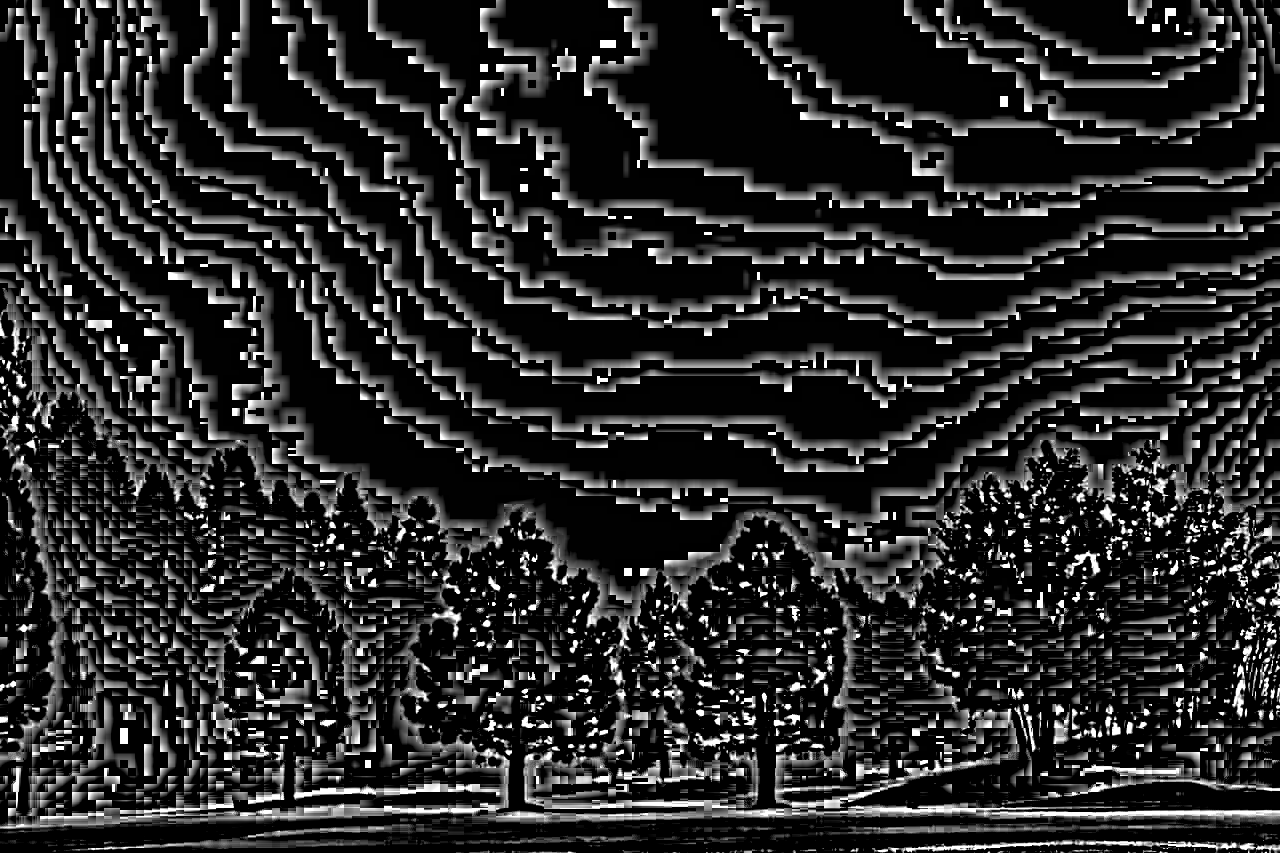

In [ ]:
cv2_imshow(new_image)

In [ ]:
# # With window size full (255)
# new_image = np.zeros((256,256))
# a = 0
# b = 0
# c = 1
# k = 1
# n_size = 255
# M = np.mean(gray)
# for i in np.arange(1,gray.shape[0]):
#     for j in np.arange(1,gray.shape[1]):
#         old = gray[i,j]
#         #neighbors = [gray[i-1,j],gray[i-1,j-1],gray[i-1,j+1],gray[i,j-1],gray[i,j+1],gray[i+1,j],gray[i+1,j-1],gray[i+1,j+1]]
#         neighbor_bound = [max(i-n_size,0), min(i+n_size,255),max(j-n_size,0), min(j+n_size,255)]
#         rmin, rmax, cmin, cmax = neighbor_bound
#         neighbors = gray[rmin:rmax,cmin:cmax]
#         m = np.mean(neighbors)
#         sigma = np.std(neighbors) + 0.0001 # Small constant added to avoid division by zero
#         #sigma_list.append(sigma)
#         new = (k*M/(sigma + b))*(old-c*m) + m**a
#         if new > 255:
#             new = 255
#         if new < 0:
#             new = 0
#         new_image[i,j] = new

In [ ]:
#cv2_imshow(new_image)

In [ ]:
def img_func(a,b,c,k, n_size = 1000):
  new_image = np.zeros((gray.shape[0],gray.shape[1]))
  M = np.mean(gray)
  rmin, rmax, cmin, cmax = [0,gray.shape[0],0,gray.shape[1]]
  neighbors = gray[rmin:rmax,cmin:cmax]
  m = np.mean(neighbors)
  sigma = np.std(neighbors) + 0.0001 # Small constant added to avoid division by zero

  for i in np.arange(0,gray.shape[0]):
    for j in np.arange(0,gray.shape[1]):
      old = gray[i,j]
      #neighbor_bound = [max(i-n_size,0), min(i+n_size,255),max(j-n_size,0), min(j+n_size,255)]
      #rmin, rmax, cmin, cmax = neighbor_bound
      #neighbors = gray[rmin:rmax,cmin:cmax]
      #m = np.mean(neighbors)
      #sigma = np.std(neighbors) + 0.0001 # Small constant added to avoid division by zero
      #sigma_list.append(sigma)
      new = (k*M/(sigma + b))*(old-c*m) + m**a
      if new > 255:
          new = 255
      if new < 0:
          new = 0
      new_image[i,j] = new
  return new_image

In [ ]:
%%time
func_trial = img_func(0,0,1,1)

CPU times: user 5.95 s, sys: 21 ms, total: 5.98 s
Wall time: 6 s


In [ ]:
func_trial

array([[ 89.29650929,  89.29650929,  89.29650929, ..., 178.01575625,
        178.01575625, 178.01575625],
       [ 89.29650929,  89.29650929,  89.29650929, ..., 178.01575625,
        178.01575625, 178.01575625],
       [ 89.29650929,  89.29650929,  89.29650929, ..., 178.01575625,
        178.01575625, 178.01575625],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

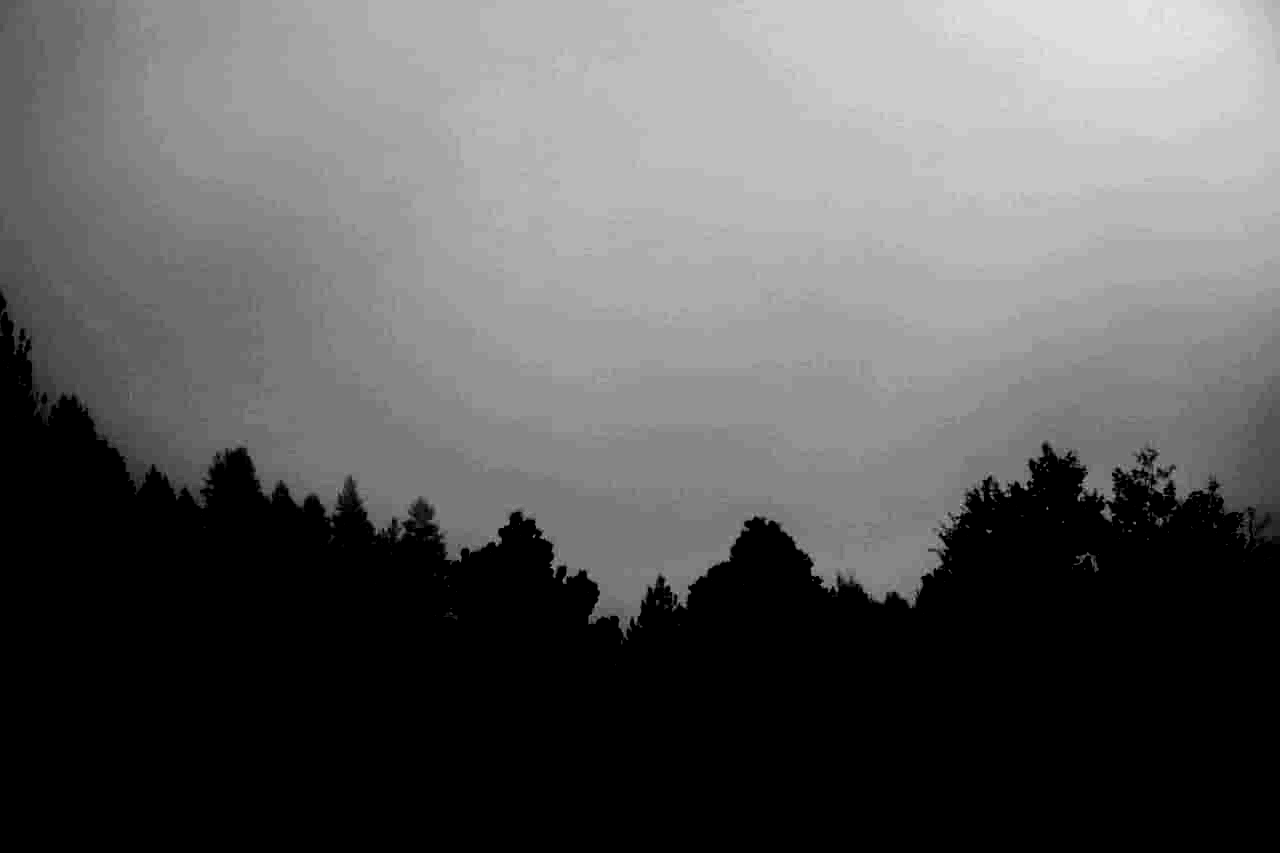

In [ ]:
cv2_imshow(func_trial)

In [ ]:
np.std(func_trial)

79.85626886643622

In [ ]:
# Differential evolution formula

In [ ]:
def gen_wi ( nr ) :     # generates random weights
  wa = [] 
  for i in range( nr-1 ) :
    wi =  random.random()
    scale = random.random()*20-10
    wi = round( wi*scale , 3 )
    wa.append( wi )
  wa.append(random.random())
  return wa

In [ ]:
gen_wi(4)

[-1.53, 0.048, 3.811, 0.5841938536145546]

In [ ]:
%%time
# As function
pop_size = 10
dim = 4
evaluation = np.zeros(pop_size)
Ws = np.zeros((pop_size,dim)) # dim is how many weights are present in our vector
qualities = np.zeros(pop_size)

for i in np.arange(pop_size):
  W = gen_wi ( dim )
  Ws[i:] = W
  new_image = img_func(W[0],W[1],W[2],W[3])
  #qual = np.std(new_image)
  qual = np.std(new_image)
  qualities[i] = qual
best_idx = np.argmax(qualities)
best_error = np.max(qualities)
print(best_error)
print(Ws[best_idx])
best_weights = Ws[best_idx]
#best_image = img_func(best_weights[0],best_weights[1],best_weights[2],best_weights[3])
F = 0.5 # Mutation
cr = 0.7 #Crossover probability
# convergence_rate = np.inf #Some initial large number
sd_list = [0] # Some initial small number
# while convergence_rate > 0.01:
for j in range(10):
   for i in range(pop_size):
     indices = np.arange(pop_size)
     np.random.shuffle(indices)
     # No step for if index is same, I guess probability is low
     a = indices[0]
     b = indices[1]
     c = indices[2]
#     #print(a,b,c) For troubleshooting if neccessary
     mutation =  Ws[a] + F* (Ws[b] - Ws[c])
#     for element in np.arange(len(mutation)):
#       if mutation[element] > 10:
#         mutation_element = 10
#       if mutation[element] < -10:
#         mutation_element = -10
#     #print(mutation)
     if mutation[-1] < 0:
      mutation[-1] = 0
     if mutation[-1] > 1:
      mutation[-1] = 1
     new_soln = np.zeros(dim)
     for k in np.arange(dim):
        p = np.random.random()
        if p < cr:
         new_soln[k] = mutation[k]
        else:
         new_soln[k] = Ws[i][k]
#     #print(new_soln)
#       # # Now gotta use new solution to create function, and find error of this function with reference data

#     Y_calc = mysteryfunc(np.array(X_exp))
     new_image = img_func(new_soln[0],new_soln[1],new_soln[2],new_soln[3])
     new_sd = np.std(new_image)
     if new_sd > qualities[i]:
      qualities[i] = new_sd
#          #print('ha')
#     #     gen_data[i:] = Y
      Ws[i] = new_soln
best_qual = np.max(qualities)
#   print(best_error)
#   if np.abs(best_error - error_list[-1]) != 0:
#     convergence_rate = np.abs(best_error - error_list[-1])
#   error_list.append(best_error)
best_idx = np.argmax(qualities)
best_soln = Ws[best_idx]

80.8076191847535
[-2.087       1.815       0.71        0.84551613]
CPU times: user 8min 54s, sys: 1.31 s, total: 8min 55s
Wall time: 8min 56s


In [ ]:
best_qual

110.95908532329582

In [ ]:
best_soln

array([-2.488     , -1.02375   ,  0.84025   ,  0.70283453])

In [ ]:
func_trial = img_func(best_soln[0],best_soln[1],best_soln[2],best_soln[3])

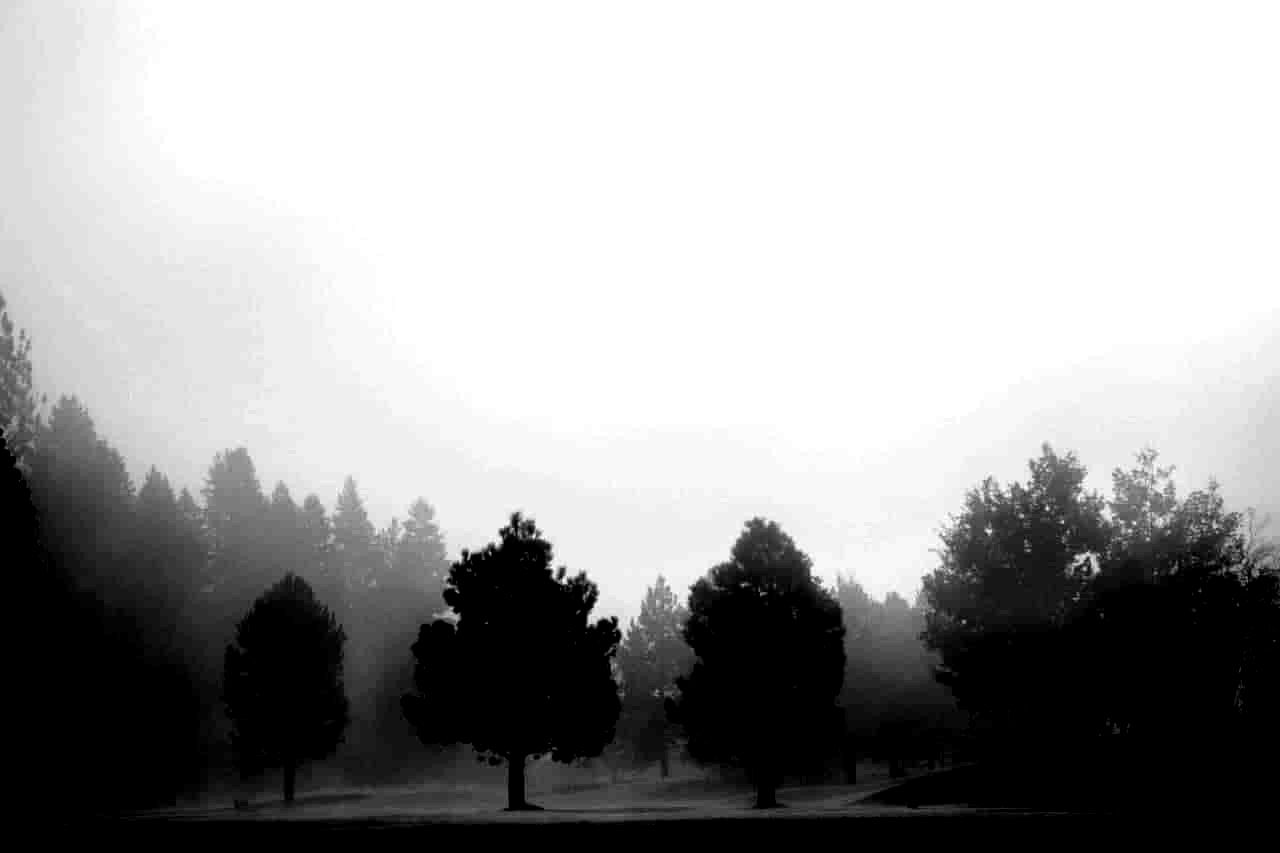

In [ ]:
cv2_imshow(func_trial)

In [ ]:
%%time
import warnings
warnings.filterwarnings("ignore")
# As function
pop_size = 100
dim = 4
evaluation = np.zeros(pop_size)
Ws = np.zeros((pop_size,dim)) # dim is how many weights are present in our vector
qualities = np.zeros(pop_size)

for i in np.arange(pop_size):
  W = gen_wi ( dim )
  Ws[i:] = W
  new_image = img_func(W[0],W[1],W[2],W[3])
  #qual = brisque.score(new_image)
  try:
    qual = brisque.score(new_image)
  except:
    qual = 1000000
  qualities[i] = qual
best_idx = np.argmin(qualities)
best_error = np.min(qualities)
print(best_error)
print(Ws[best_idx])
best_weights = Ws[best_idx]
#best_image = img_func(best_weights[0],best_weights[1],best_weights[2],best_weights[3])
F = 0.5 # Mutation
cr = 0.7 #Crossover probability
# convergence_rate = np.inf #Some initial large number
sd_list = [0] # Some initial small number
# while convergence_rate > 0.01:
for j in range(2):
   for i in range(pop_size):
     indices = np.arange(pop_size)
     np.random.shuffle(indices)
     # No step for if index is same, I guess probability is low
     a = indices[0]
     b = indices[1]
     c = indices[2]
#     #print(a,b,c) For troubleshooting if neccessary
     mutation =  Ws[a] + F* (Ws[b] - Ws[c])
#     for element in np.arange(len(mutation)):
#       if mutation[element] > 10:
#         mutation_element = 10
#       if mutation[element] < -10:
#         mutation_element = -10
#     #print(mutation)
     if mutation[-1] < 0:
      mutation[-1] = 0
     if mutation[-1] > 1:
      mutation[-1] = 1
     new_soln = np.zeros(dim)
     for k in np.arange(dim):
        p = np.random.random()
        if p < cr:
         new_soln[k] = mutation[k]
        else:
         new_soln[k] = Ws[i][k]
#     #print(new_soln)
#       # # Now gotta use new solution to create function, and find error of this function with reference data

#     Y_calc = mysteryfunc(np.array(X_exp))
     new_image = img_func(new_soln[0],new_soln[1],new_soln[2],new_soln[3])
     try:
      qual = brisque.score(new_image)
     except:
      qual = 1000000
     new_sd = qual
     if new_sd < qualities[i]:
      qualities[i] = new_sd
#          #print('ha')
#     #     gen_data[i:] = Y
      Ws[i] = new_soln
best_qual = np.min(qualities)
#   print(best_error)
#   if np.abs(best_error - error_list[-1]) != 0:
#     convergence_rate = np.abs(best_error - error_list[-1])
#   error_list.append(best_error)
best_idx = np.argmin(qualities)
best_soln = Ws[best_idx]

60.030300047322925
[-0.109      -0.038      -0.011       0.01427062]
CPU times: user 5min 37s, sys: 36.4 s, total: 6min 14s
Wall time: 5min 39s


In [ ]:
func_trial = img_func(best_soln[0],best_soln[1],best_soln[2],best_soln[3])

In [ ]:
np.std(func_trial)

0.13599902568711

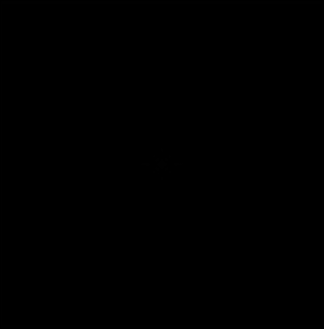

In [ ]:
cv2_imshow(func_trial)

In [ ]:
img1=np.uint8(cv.normalize(func_trial, None, 0, 255, cv.NORM_MINMAX))
plt.figure()
plt.imshow(cv.equalizeHist(img1),cmap=plt.cm.gray)
plt.figure()
plt.imshow(equ, cmap=plt.cm.gray)


In [ ]:
#np.std(equ)
#np.std(cv.equalizeHist(img1))

In [ ]:
#import warnings
#warnings.filterwarnings("ignore")
# As function
pop_size = 100
dim = 4
evaluation = np.zeros(pop_size)
Ws = np.zeros((pop_size,dim)) # dim is how many weights are present in our vector
qualities = np.zeros(pop_size)

for i in np.arange(pop_size):
  W = gen_wi ( dim )
  Ws[i:] = W
  new_image = img_func(W[0],W[1],W[2],W[3])
  #qual = np.std(new_image)
  try:
    qual = brisque.score(new_image)
  except:
    qual = 1000000
  qualities[i] = qual
best_idx = np.argmin(qualities)
best_error = np.min(qualities)
worst_index = np.argmax(qualities)
print(best_error)
print(Ws[best_idx])


In [ ]:
sorted(qualities)

In [ ]:
W = Ws[best_idx]

In [ ]:
test1 = img_func(W[0],W[1],W[2],W[3])

In [ ]:
cv2_imshow(test1)

In [ ]:
W = Ws[worst_index]

In [ ]:
test = img_func(W[0],W[1],W[2],W[3])

In [ ]:
cv2_imshow(test)

In [ ]:
test2 = cv.equalizeHist(test1)

In [ ]:
test1

In [ ]:
gray

In [ ]:
img1=np.uint8(cv.normalize(test1, None, 0, 255, cv.NORM_MINMAX))
plt.imshow(cv.equalizeHist(img1),cmap=plt.cm.gray)


In [ ]:
plt.imshow(equ,cmap=plt.cm.gray)

In [ ]:
brisque.score(equ)